In [1]:
# best parameters are identified using grid search with cross validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [2]:
churn = pd.read_csv('Churn.csv')
print(churn.shape)
#churn.head()

(3333, 21)


In [3]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [4]:
2850/(2850+483)

0.8550855085508551

In [5]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [6]:
# check if any NA values
churn.isnull().sum().sum()

0

In [7]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=["Churn"])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 19)


In [8]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 19)
(2666, 1)
(667, 19)
(667, 1)


In [9]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [10]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [11]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
print(X_train.State.head())

1460    26
2000    38
666     37
2962    41
2773    31
Name: State, dtype: int32


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
# split the Train data into Categorical and non-categorical
catcols = ['State', 'AreaCode']
X_train_cat = pd.DataFrame(X_train, columns=catcols)
print(X_train_cat.shape)
X_train_cont = X_train.copy()
X_train_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_train_cont.shape)
X_train_cont.reset_index(drop=True,inplace=True)

(2666, 2)
(2666, 17)


In [13]:
# split the Test data into Categorical and non-categorical
X_test_cat = pd.DataFrame(X_test, columns=catcols)
print(X_test_cat.shape)
X_test_cont = X_test.copy()
print(X_test_cont.columns)
X_test_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_test_cont.shape)
X_test_cont.reset_index(drop=True,inplace=True)

(667, 2)
Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'],
      dtype='object')
(667, 17)


In [14]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(2666, 54)
(667, 54)


In [15]:
# convert back array into data frame
X_train_cat3 = pd.DataFrame(X_train_cat2)
print(X_train_cat3.shape)
X_test_cat3 = pd.DataFrame(X_test_cat2)
print(X_test_cat3.shape)

(2666, 54)
(667, 54)


In [16]:
# merge continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont,X_train_cat3],axis=1,join='outer',ignore_index=False)
X_test_final = pd.concat([X_test_cont,X_test_cat3],axis=1,join='outer',ignore_index=False)
print(X_train_final.shape)
print(X_test_final.shape)

(2666, 71)
(667, 71)


In [17]:
# gradient boosting
# build the gradientboost object
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier()

# build grid search parameters
parms = {'max_depth':[2,3,4],
         'n_estimators': [5,10,20], 
         'learning_rate': [0.05,0.1,0.3],
          'subsample':[0.3,0.6,0.9]} 

from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = GBM,param_grid = parms,
                  scoring = 'f1_macro',cv=3,refit=True,
                  return_train_score = True,verbose=10)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.0s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6, score=(train=0.460, test=0.460), total=   0.0s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6, score=(train=0.460, test=0.460), total=   0.0s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.6, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9 ..
[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9 ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3 .
[CV]  learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3 .
[CV]  learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3, score=(train=0.460, test=0.468), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3 .
[CV]  learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.3, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.6 .
[CV]  learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.6, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=10, subsample=0.6 .
[CV]  learning_rate=0.05, max_depth=2, n_estimators=10, 

[CV]  learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.9, score=(train=0.776, test=0.735), total=   0.3s
[CV] learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.9 .
[CV]  learning_rate=0.05, max_depth=3, n_estimators=20, subsample=0.9, score=(train=0.762, test=0.722), total=   0.3s
[CV] learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.0s
[CV] learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3 ..
[CV]  learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.3, score=(train=0.460, test=0.460), total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=5, subsample=0.6 ..
[CV]  learning_rate=0.05, max_depth=4, n_estimators=5, sub

[CV]  learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.9, score=(train=0.621, test=0.598), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.9 ..
[CV]  learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.9, score=(train=0.640, test=0.589), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.9 ..
[CV]  learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.9, score=(train=0.519, test=0.513), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=20, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.713, test=0.733), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=20, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.767, test=0.723), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=20, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=2, n_estimators=20, subsa

[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9, score=(train=0.598, test=0.585), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9, score=(train=0.730, test=0.676), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9, score=(train=0.626, test=0.597), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3, score=(train=0.829, test=0.772), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3, score=(train=0.797, test=0.739), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10, subsample=0.3 ..
[CV]  learning_rate=0.1, max_depth=4, n_estimators=10, subsampl

[CV]  learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.6, score=(train=0.868, test=0.760), total=   0.2s
[CV] learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9, score=(train=0.867, test=0.841), total=   0.2s
[CV] learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9, score=(train=0.874, test=0.823), total=   0.2s
[CV] learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=2, n_estimators=20, subsample=0.9, score=(train=0.878, test=0.815), total=   0.2s
[CV] learning_rate=0.3, max_depth=3, n_estimators=5, subsample=0.3 ...
[CV]  learning_rate=0.3, max_depth=3, n_estimators=5, subsample=0.3, score=(train=0.834, test=0.779), total=   0.0s
[CV] learning_rate=0.3, max_depth=3, n_estimators=5, subsample=0.3 ...
[CV]  learning_rate=0.3, max_depth=3, n_estimators=5, subsamp

[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.6, score=(train=0.946, test=0.850), total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9, score=(train=0.953, test=0.861), total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9, score=(train=0.954, test=0.875), total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9 ..
[CV]  learning_rate=0.3, max_depth=4, n_estimators=10, subsample=0.9, score=(train=0.941, test=0.854), total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=20, subsample=0.3 ..
[CV]  learning_rate=0.3, max_depth=4, n_estimators=20, subsample=0.3, score=(train=0.902, test=0.826), total=   0.2s
[CV] learning_rate=0.3, max_depth=4, n_estimators=20, subsample=0.3 ..
[CV]  learning_rate=0.3, max_depth=4, n_estimators=20, subsa

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:   36.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...,
                

In [18]:
# check the results
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_GBoosting.xlsx')

In [16]:
print(CV.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [17]:
print(CV.best_score_)
print(CV.best_params_)

0.8158456587512459
{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 20, 'subsample': 0.9}


In [19]:
# Preidct on Test data and check the confusion matrix
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["Class0","Class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[[0.91384852 0.08615148]
 [0.97994751 0.02005249]
 [0.97549975 0.02450025]
 [0.98185319 0.01814681]
 [0.12780842 0.87219158]]
[0 0 0 0 1]


In [21]:
predict = np.zeros([1,1])
for model in CV.best_estimator_.estimators_:
    predict = np.vstack((predict,model[0].predict(X_test_final[0:1])))
predict = predict[1:]
print(predict)
print("average: ",np.sum(predict,axis=0))
print("final Prediction: ", CV.best_estimator_.predict(X_test_final[0:1]))

[[ 6.05025245]
 [-0.84993961]
 [-0.64805045]
 [-1.39425969]
 [-0.4673744 ]
 [-0.68075506]
 [-0.04467546]
 [-0.86452901]
 [-0.58601889]
 [-0.50612772]
 [-0.508144  ]
 [-0.21914125]
 [ 0.12174343]
 [-0.35284755]
 [-0.08913058]
 [-0.337638  ]
 [ 0.59137061]
 [-0.81789807]
 [-0.35567702]
 [-0.08271961]]
average:  [-2.04155987]
final Prediction:  [0]


In [22]:
for m in CV.best_estimator_.staged_decision_function(X_test_final[0:1]):
    print(m)
CV.best_estimator_.decision_function(X_test_final[0:1])

[[0.06598596]]
[[-0.18899593]]
[[-0.38341106]]
[[-0.80168897]]
[[-0.94190129]]
[[-1.1461278]]
[[-1.15953044]]
[[-1.41888914]]
[[-1.59469481]]
[[-1.74653313]]
[[-1.89897633]]
[[-1.9647187]]
[[-1.92819567]]
[[-2.03404994]]
[[-2.06078911]]
[[-2.16208051]]
[[-1.98466933]]
[[-2.23003875]]
[[-2.33674186]]
[[-2.36155774]]


array([-2.36155774])

In [39]:
for m in CV.best_estimator_.staged_predict(X_test[0:1]):
    print(m)

[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [38]:
for m in CV.best_estimator_.staged_predict_proba(X_test[0:1]):
    print(m)

[[0.57296812 0.42703188]]
[[0.50481788 0.49518212]]
[[0.44119927 0.55880073]]
[[0.42406277 0.57593723]]
[[0.43943669 0.56056331]]
[[0.3974883 0.6025117]]
[[0.39151762 0.60848238]]
[[0.3579884 0.6420116]]
[[0.36939313 0.63060687]]
[[0.38704908 0.61295092]]
[[0.34070709 0.65929291]]
[[0.34577567 0.65422433]]
[[0.35970763 0.64029237]]
[[0.32390687 0.67609313]]
[[0.29203397 0.70796603]]
[[0.29317545 0.70682455]]
[[0.32549439 0.67450561]]
[[0.31036896 0.68963104]]
[[0.31422097 0.68577903]]
[[0.32287592 0.67712408]]


In [23]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[563  16]
 [ 16  72]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       579
           1       0.82      0.82      0.82        88

    accuracy                           0.95       667
   macro avg       0.90      0.90      0.90       667
weighted avg       0.95      0.95      0.95       667



In [25]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb.Class1)
print(AUC)

0.918560606060606


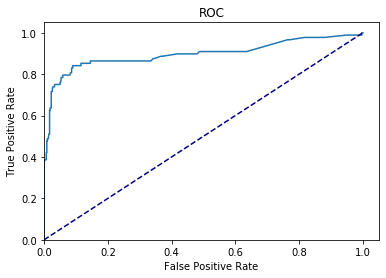

In [21]:
# plot ROC curve
FPR, TPR, THR = roc_curve(Y_test, PProb.Class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [22]:
ROC = pd.DataFrame({"THR":THR,
                   "TPR":TPR,
                   "FPR":FPR})
ROC.to_excel('ROC_GBM.xlsx')

In [23]:
pclass = list()
for prob in PProb.Class1:
    if prob >= 0.55:
        pclass.append(1)
    else:
        pclass.append(0)
print(PProb.Class1.head())
print(pclass[0:5])

0    0.677124
1    0.032931
2    0.039866
3    0.046535
4    0.848770
Name: Class1, dtype: float64
[1, 0, 0, 0, 1]


In [24]:
print (confusion_matrix(Y_test,pclass))
print (classification_report(Y_test,pclass))

[[569  10]
 [ 39  49]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       579
           1       0.83      0.56      0.67        88

    accuracy                           0.93       667
   macro avg       0.88      0.77      0.81       667
weighted avg       0.92      0.93      0.92       667



In [25]:
testcomp = pd.read_excel('testcomp.xlsx')
testcomp.head()

,Unnamed: 0,Actuals,DTPred,BagPred,RFPred,AdaboostPred
0,405,0,1,1,1,1
1,118,0,0,0,0,0
2,710,0,0,0,0,0
3,499,0,0,0,0,0
4,2594,1,1,1,1,1


In [26]:
testcomp["GBMPred"] = predictTest
testcomp.to_excel('testcomp.xlsx',index=False)

In [28]:
CV.best_estimator_.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x00000294F651AAB0>,
                      splitter='best')